In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import gc

In [3]:
data = pd.read_csv('train.csv')

In [16]:
print(data.shape)
data.head()

(18359, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [11]:
data['relevent_experience'].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [12]:
data['education_level'].unique()

array(['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'],
      dtype=object)

In [13]:
data['major_discipline'].unique()

array(['STEM', 'Other', 'No Major', nan, 'Business Degree', 'Arts',
       'Humanities'], dtype=object)

In [29]:
data['company_type'].unique()

array(['Pvt Ltd', 'Funded Startup', 'Public Sector', nan,
       'Early Stage Startup', 'NGO', 'Other'], dtype=object)

In [30]:
data['enrolled_university'].unique()

array(['no_enrollment', 'Full time course', 'Part time course', nan],
      dtype=object)

In [15]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

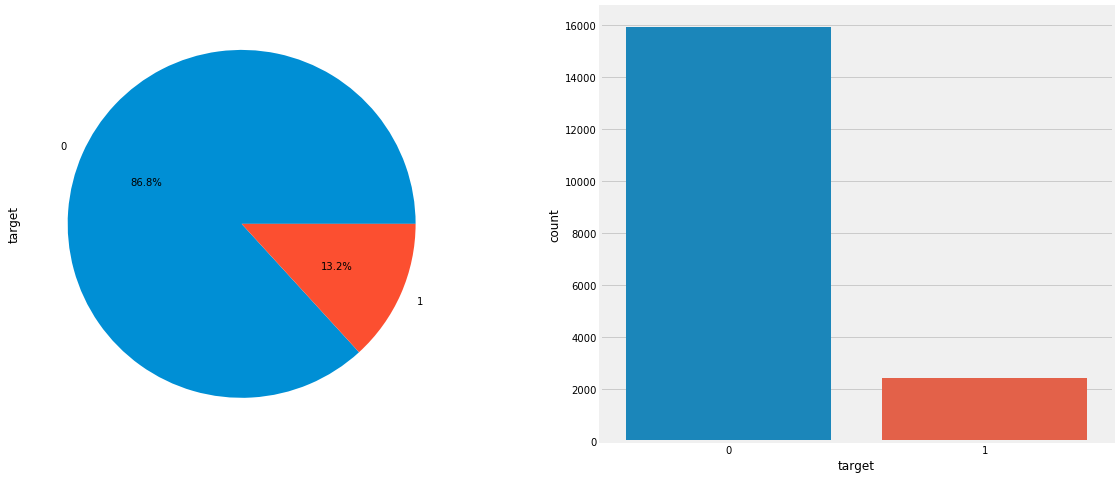

In [28]:
f,ax = plt.subplots(1,2,figsize = (18,8))
data['target'].value_counts().plot.pie(ax = ax[0],autopct = '%1.1f%%')
sns.countplot('target',data = data,ax = ax[1])

nominal variables:
    gender, relevent_experience, enrolled_university,company_type
ordinal variables:
    education_level,major_discipline,

In [31]:
data.groupby(['gender','target'])['target'].count()

gender  target
Female  0          1009
        1           179
Male    0         11306
        1          1578
Other   0           160
        1            29
Name: target, dtype: int64

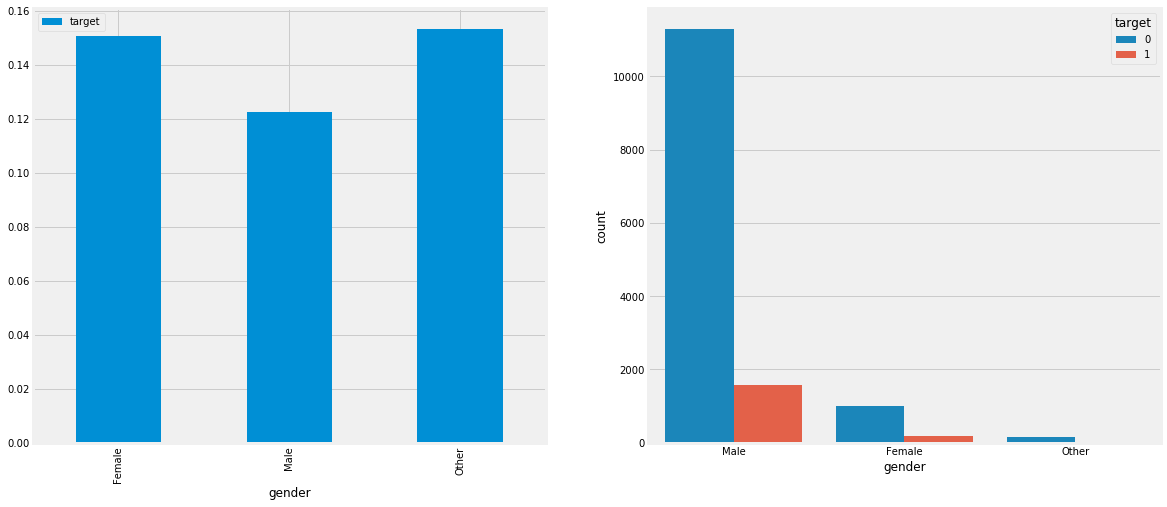

In [36]:
f,ax = plt.subplots(1,2,figsize = (18,8))
data[['gender','target']].groupby('gender').mean().plot.bar(ax = ax[0])
sns.countplot('gender',data = data,ax=ax[1],hue ='target')

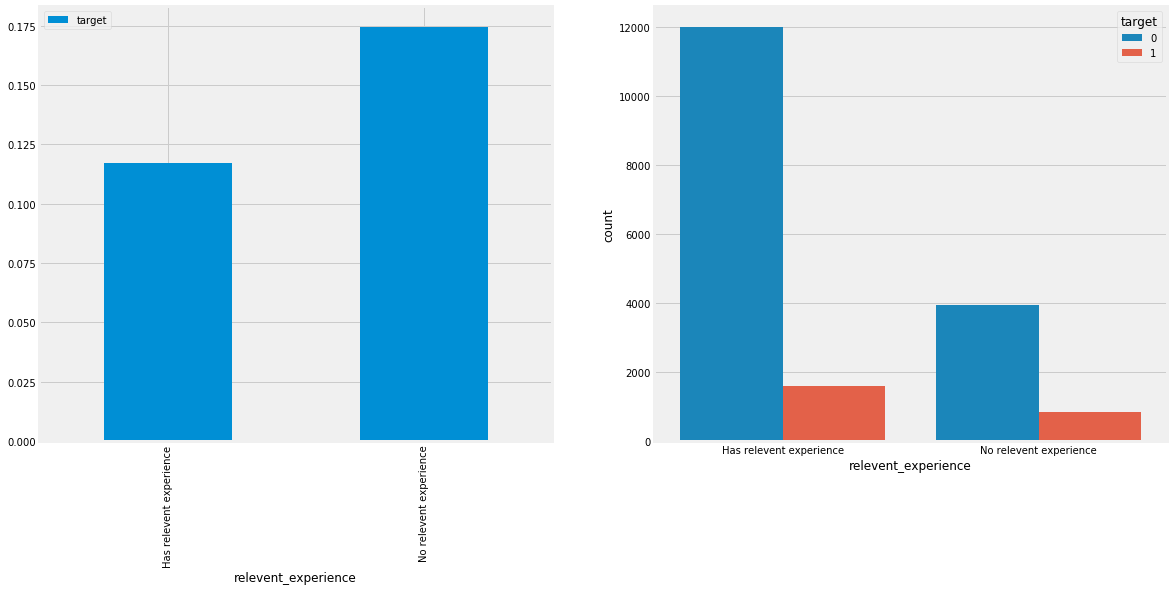

In [37]:
f,ax = plt.subplots(1,2,figsize = (18,8))
data[['relevent_experience','target']].groupby('relevent_experience').mean().plot.bar(ax = ax[0])
sns.countplot('relevent_experience',data = data,ax=ax[1],hue ='target')

In [41]:
pd.crosstab(data['enrolled_university'],data['target'],margins = True).style.background_gradient(cmap='summer_r')

target,0,1,All
enrolled_university,,,
Full time course,2580,607,3187
Part time course,997,174,1171
no_enrollment,12071,1588,13659
All,15648,2369,18017


In [42]:

pd.crosstab(data['company_type'],data['target'],margins = True).style.background_gradient(cmap='summer_r')

target,0,1,All
company_type,,,
Early Stage Startup,508,74,582
Funded Startup,942,96,1038
NGO,465,69,534
Other,100,19,119
Public Sector,844,152,996
Pvt Ltd,8954,1097,10051
All,11813,1507,13320


In [57]:
data[data['experience'].isnull()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
149,17077,city_134,0.698,NaN,No relevent experience,no_enrollment,NaN,NaN,NaN,NaN,NaN,never,106,0
940,23806,city_114,0.926,NaN,Has relevent experience,Full time course,NaN,NaN,NaN,100-500,NaN,1,35,0
1336,4823,city_123,0.738,NaN,Has relevent experience,no_enrollment,Graduate,STEM,NaN,100-500,Pvt Ltd,NaN,9,1
1445,17123,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,NaN,NaN,NaN,NaN,32,0
2031,19353,city_73,0.754,NaN,Has relevent experience,Full time course,Graduate,STEM,NaN,NaN,NaN,1,12,1
2627,20332,city_103,0.920,NaN,Has relevent experience,Full time course,Phd,STEM,NaN,10000+,Public Sector,never,56,0
2830,10582,city_36,0.893,NaN,No relevent experience,no_enrollment,High School,NaN,NaN,NaN,NaN,never,44,0
2905,14965,city_103,0.920,NaN,Has relevent experience,no_enrollment,Masters,STEM,NaN,NaN,NaN,NaN,70,0
3103,20153,city_103,0.920,NaN,No relevent experience,Full time course,Graduate,STEM,NaN,10000+,NaN,NaN,20,1
3306,21617,city_134,0.698,NaN,No relevent experience,no_enrollment,NaN,NaN,NaN,NaN,NaN,never,45,0


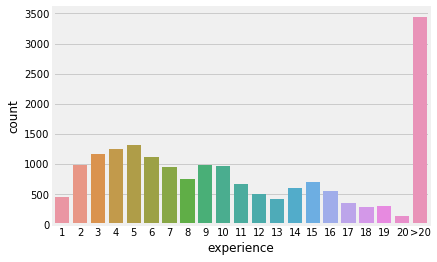

In [58]:
sns.countplot('experience',data = data,order = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','>20'])

In [74]:
data['experience'][data['experience'] == '>20'] = 21
data['experience'][data['experience'] == '<1'] = 0
#data['experience'] = data['experience'].astype('int64')
#data.groupby(['education_level','experience'])['experience'].count()

# Another method

In [76]:
#All functions

#FUNCTION FOR PROVIDING FEATURE SUMMARY
def feature_summary(df_fa):
    print('DataFrame shape')
    print('rows:',df_fa.shape[0])
    print('cols:',df_fa.shape[1])
    col_list=['Null','Unique_Count','Data_type','Max/Min','Mean','Std','Skewness','Sample_values']
    df=pd.DataFrame(index=df_fa.columns,columns=col_list)
    df['Null']=list([len(df_fa[col][df_fa[col].isnull()]) for i,col in enumerate(df_fa.columns)])
    #df['%_Null']=list([len(df_fa[col][df_fa[col].isnull()])/df_fa.shape[0]*100 for i,col in enumerate(df_fa.columns)])
    df['Unique_Count']=list([len(df_fa[col].unique()) for i,col in enumerate(df_fa.columns)])
    df['Data_type']=list([df_fa[col].dtype for i,col in enumerate(df_fa.columns)])
    for i,col in enumerate(df_fa.columns):
        if 'float' in str(df_fa[col].dtype) or 'int' in str(df_fa[col].dtype):
            df.at[col,'Max/Min']=str(round(df_fa[col].max(),2))+'/'+str(round(df_fa[col].min(),2))
            df.at[col,'Mean']=df_fa[col].mean()
            df.at[col,'Std']=df_fa[col].std()
            df.at[col,'Skewness']=df_fa[col].skew()
        df.at[col,'Sample_values']=list(df_fa[col].unique())
           
    return(df.fillna('-'))



In [77]:
#train=pd.read_csv(path1+'application_train.csv')
print('application_train Feature Summary')
with pd.option_context('display.max_rows',data.shape[1]):
    train_fs=feature_summary(data) 

application_train Feature Summary
DataFrame shape
rows: 18359
cols: 14


In [98]:
train_fs

,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values
enrollee_id,0,18359,int64,33380/1,16729.4,9643.75,0.000565788,"[23798, 29166, 46, 18527, 21751, 13342, 11746,..."
city,0,123,object,-,-,-,-,"[city_149, city_83, city_16, city_64, city_100..."
city_development_index,0,93,float64,0.95/0.45,0.84714,0.110189,-1.32736,"[0.6890000000000001, 0.9229999999999999, 0.91,..."
gender,4098,4,object,-,-,-,-,"[Male, nan, Female, Other]"
relevent_experience,0,2,object,-,-,-,-,"[Has relevent experience, No relevent experience]"
enrolled_university,342,4,object,-,-,-,-,"[no_enrollment, Full time course, Part time co..."
education_level,457,6,object,-,-,-,-,"[Graduate, Masters, High School, Phd, nan, Pri..."
major_discipline,2838,7,object,-,-,-,-,"[STEM, Other, No Major, nan, Business Degree, ..."
experience,59,23,object,-,-,-,-,"[3, 14, 6, 8, 21, 4, 9, 15, 10, 1, 5, 16, 11, ..."
company_size,4779,9,object,-,-,-,-,"[100-500, <10, 50-99, nan, 5000-9999, 10000+, ..."


In [80]:
def drop_corr_col(df_corr):
    upper = df_corr.where(np.triu(np.ones(df_corr.shape),
                          k=1).astype(np.bool))
    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
    return(to_drop)

In [81]:
print('FEATURE SUMMARY: Categorical Features')
cat_features=train_fs[train_fs.Data_type=='object'].index
print('Total categorical features:',len(cat_features))

FEATURE SUMMARY: Categorical Features
Total categorical features: 10


In [83]:
cat_fs=train_fs[train_fs.Data_type=='object']
cat_fs['Desc']=cat_fs.index
cat_fs

,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values,Desc
city,0,123,object,-,-,-,-,"[city_149, city_83, city_16, city_64, city_100...",city
gender,4098,4,object,-,-,-,-,"[Male, nan, Female, Other]",gender
relevent_experience,0,2,object,-,-,-,-,"[Has relevent experience, No relevent experience]",relevent_experience
enrolled_university,342,4,object,-,-,-,-,"[no_enrollment, Full time course, Part time co...",enrolled_university
education_level,457,6,object,-,-,-,-,"[Graduate, Masters, High School, Phd, nan, Pri...",education_level
major_discipline,2838,7,object,-,-,-,-,"[STEM, Other, No Major, nan, Business Degree, ...",major_discipline
experience,59,23,object,-,-,-,-,"[3, 14, 6, 8, 21, 4, 9, 15, 10, 1, 5, 16, 11, ...",experience
company_size,4779,9,object,-,-,-,-,"[100-500, <10, 50-99, nan, 5000-9999, 10000+, ...",company_size
company_type,5039,7,object,-,-,-,-,"[Pvt Ltd, Funded Startup, Public Sector, nan, ...",company_type
last_new_job,367,7,object,-,-,-,-,"[1, 2, 3, >4, never, 4, nan]",last_new_job


In [85]:
for col in cat_features:
    data[col]=data[col].apply(lambda x: str(x).replace(" ","_"))

In [91]:

#converting call categorical features into dummies 
cat_train=pd.DataFrame()
for col in cat_features:
    dummy=pd.get_dummies(data[col],prefix=col)
    cat_train=pd.concat([cat_train,dummy],axis=1)
cat_train.head()

,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,...,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_nan,last_new_job_never
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [158]:
del dummy
gc.collect()
print('Newly created dummy columns:',len(cat_train.columns))

Newly created dummy columns: 192


In [96]:
data['city'].unique()

array(['city_149', 'city_83', 'city_16', 'city_64', 'city_100', 'city_21',
       'city_114', 'city_103', 'city_97', 'city_160', 'city_65',
       'city_90', 'city_75', 'city_136', 'city_159', 'city_67', 'city_28',
       'city_10', 'city_73', 'city_76', 'city_104', 'city_27', 'city_30',
       'city_61', 'city_99', 'city_41', 'city_142', 'city_9', 'city_116',
       'city_128', 'city_74', 'city_69', 'city_1', 'city_176', 'city_40',
       'city_123', 'city_152', 'city_165', 'city_89', 'city_36',
       'city_44', 'city_46', 'city_45', 'city_134', 'city_93', 'city_180',
       'city_162', 'city_84', 'city_138', 'city_173', 'city_19',
       'city_71', 'city_158', 'city_23', 'city_102', 'city_105',
       'city_91', 'city_11', 'city_13', 'city_57', 'city_20', 'city_14',
       'city_37', 'city_115', 'city_50', 'city_167', 'city_12',
       'city_143', 'city_126', 'city_77', 'city_101', 'city_150',
       'city_179', 'city_107', 'city_175', 'city_146', 'city_98',
       'city_166', 'city

In [159]:
%%time
#creating correlation matrix with absolute values
corr=cat_train.corr().abs()
#identifying features with high correlation value
to_drop=drop_corr_col(corr)
cat_train.drop(to_drop,axis=1,inplace=True)
print('Drop following features as they have high correlation other columns:\n',to_drop,'\n')
print('Categorical Features after dropping correlated features:',cat_train.shape)

Drop following features as they have high correlation other columns:
 ['relevent_experience_No_relevent_experience'] 

Categorical Features after dropping correlated features: (15021, 191)
CPU times: user 899 ms, sys: 19.8 ms, total: 918 ms
Wall time: 951 ms


In [102]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
import warnings

In [105]:
train_X,test_X,train_y,test_y=train_test_split(cat_train,data['target'],random_state=200)
model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1)
model.fit(train_X,train_y)
print('Createing a basic LGBM classifier on categorical data. To check can newly created features be consumed by a model')
print('roc auc score:',roc_auc_score(test_y,model.predict_proba(test_X)[:,1]))

Createing a basic LGBM classifier on categorical data. To check can newly created features be consumed by a model
roc auc score: 0.6540648654502139


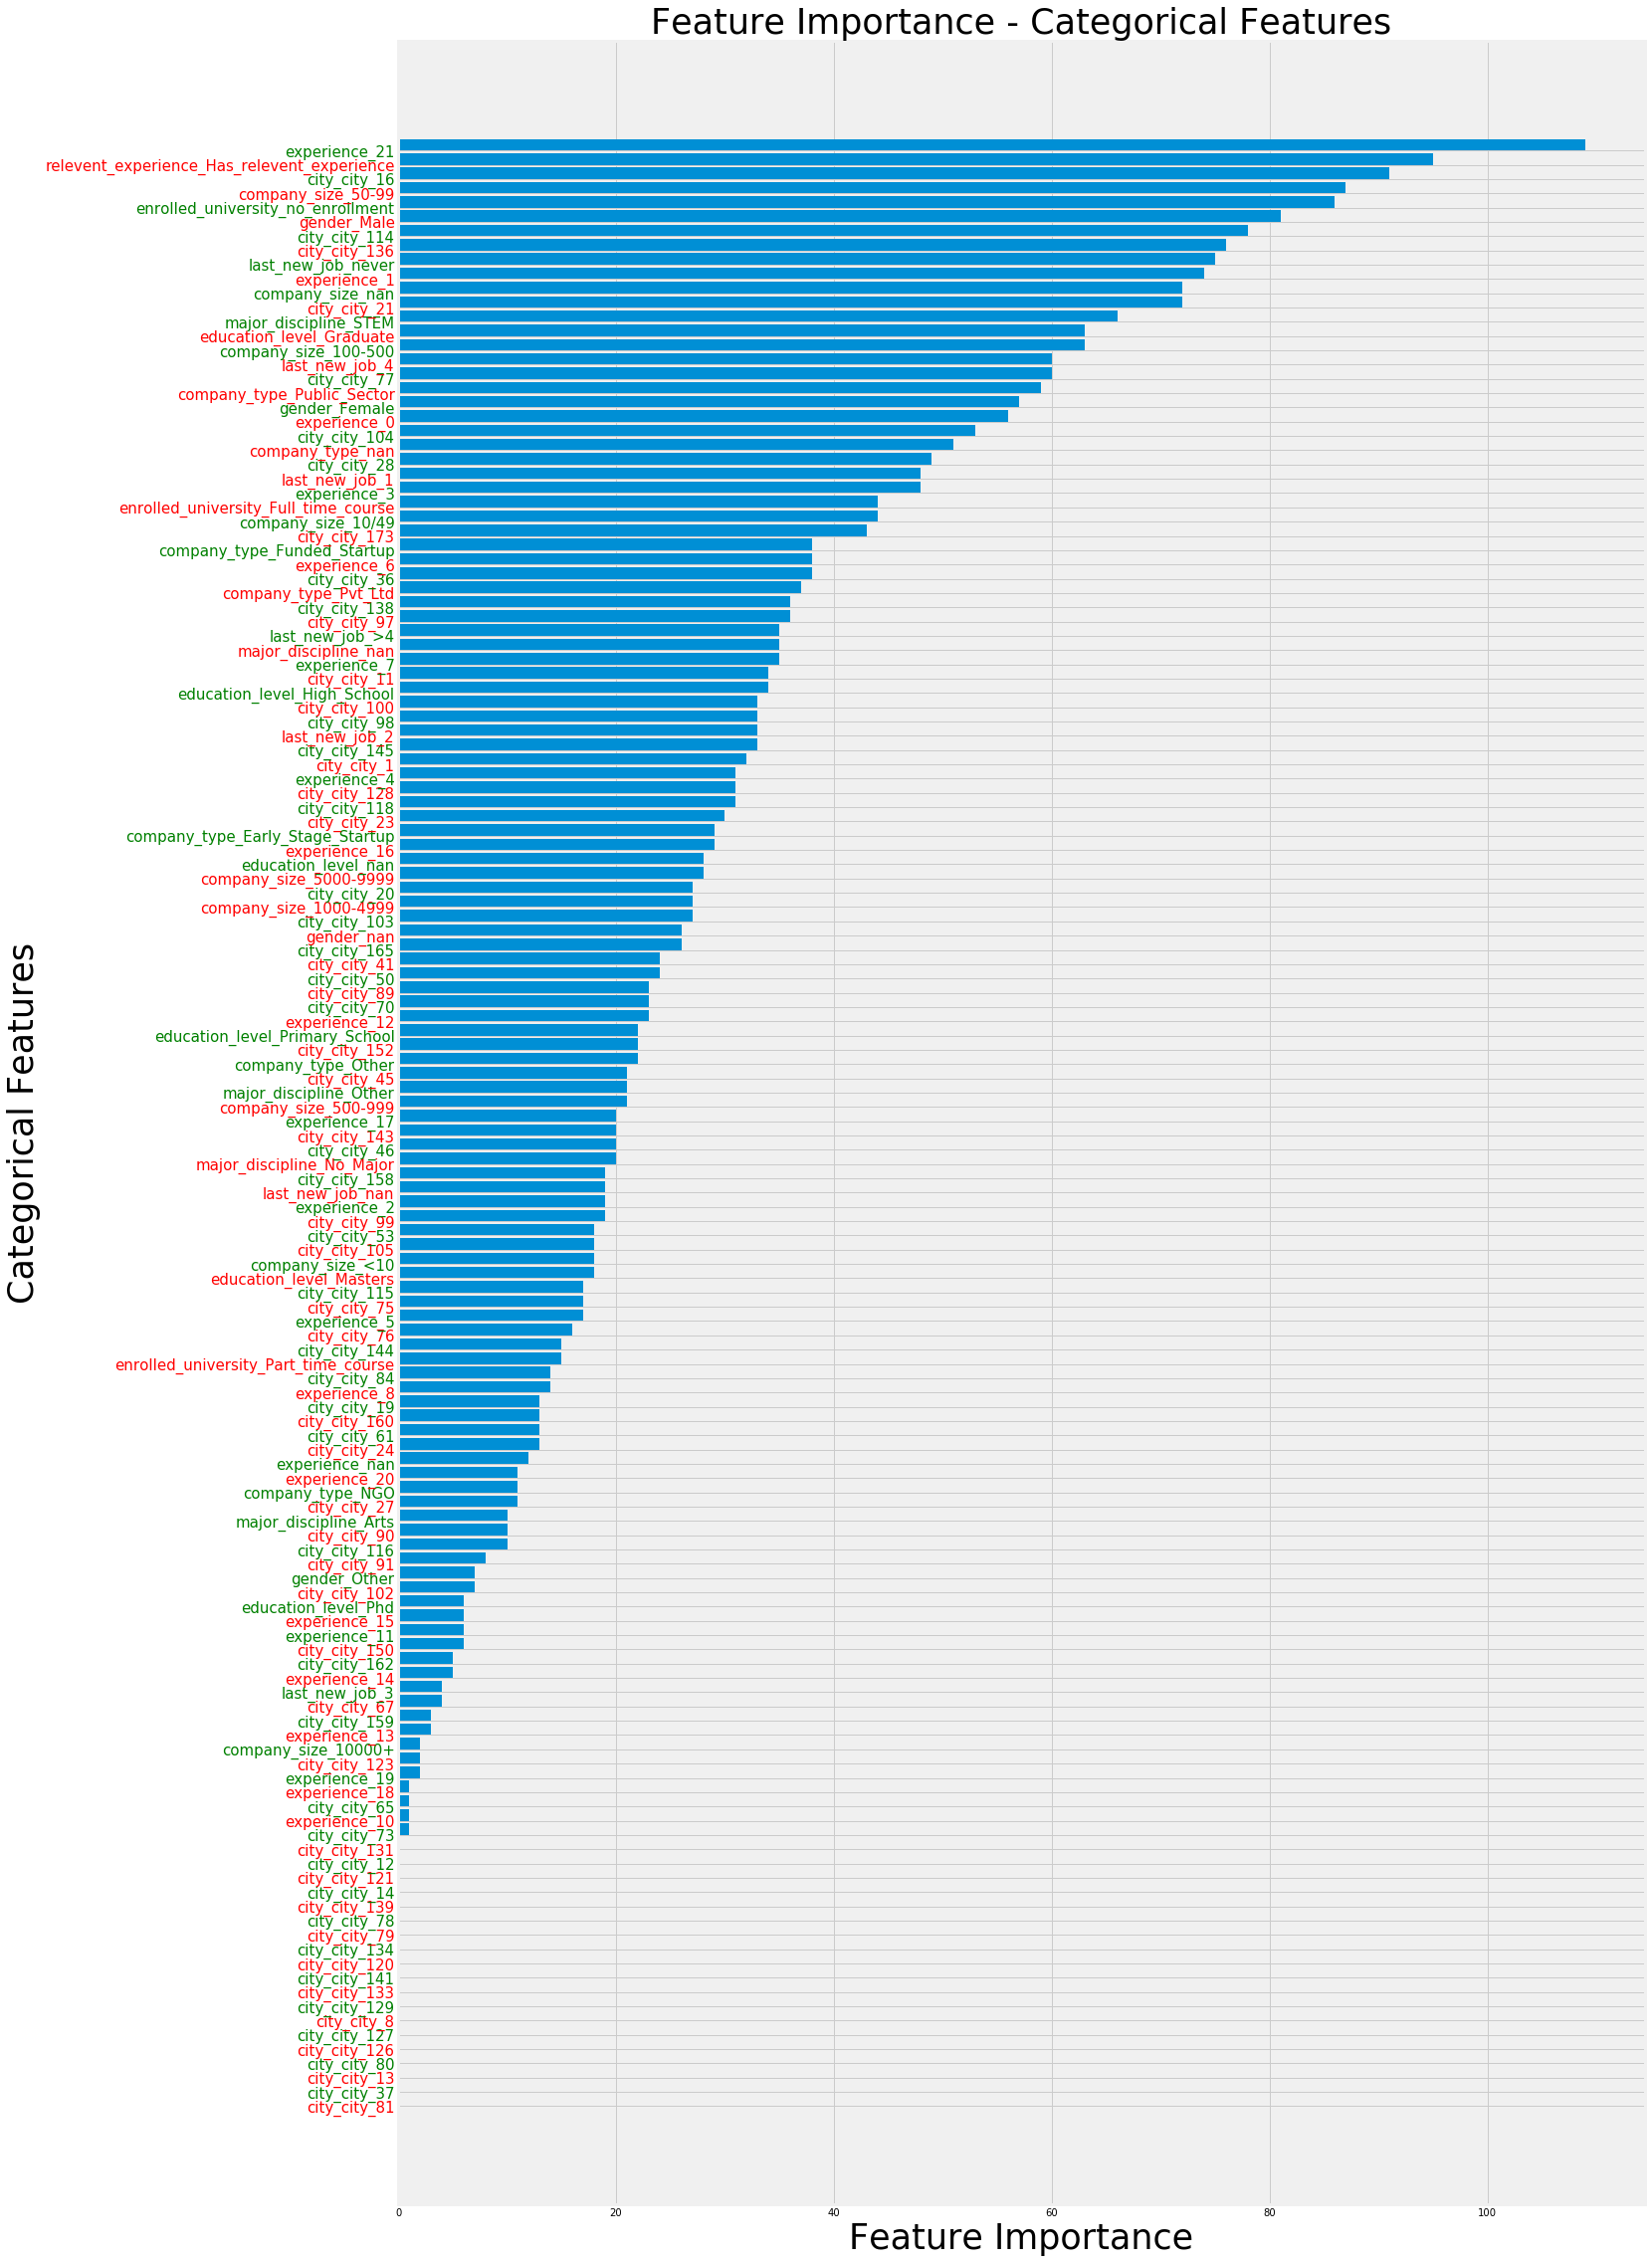

In [106]:
indices = np.argsort(model.feature_importances_)[::-1]
names = [cat_train.columns[i] for i in indices[:138]]
fig,ax=plt.subplots(figsize=(20,40))
plt.title("Feature Importance - Categorical Features",fontsize=35)
plt.ylabel("Categorical Features",fontsize=35)
plt.xlabel("Feature Importance",fontsize=35)
df_fi_cat=pd.DataFrame(model.feature_importances_[indices[:138]],columns=['Feature_imp'])
df_fi_cat['names']=names
df_fi_cat.sort_values(by='Feature_imp',inplace=True)
plt.barh(range(138),df_fi_cat['Feature_imp'],align='edge')
plt.yticks(range(138),df_fi_cat['names'],color='g',fontsize=15)
for i in range(0,138,2):
    ax.get_yticklabels()[i].set_color("red")

plt.show()

In [107]:
chi2_selector=SelectKBest(chi2,k=138)
feature_kbest=chi2_selector.fit_transform(cat_train,data['target'])
df_chi=pd.DataFrame(chi2_selector.scores_,columns=['chi_score'])
df_chi['columns']=cat_train.columns
df_chi_s=df_chi.sort_values(by='chi_score')

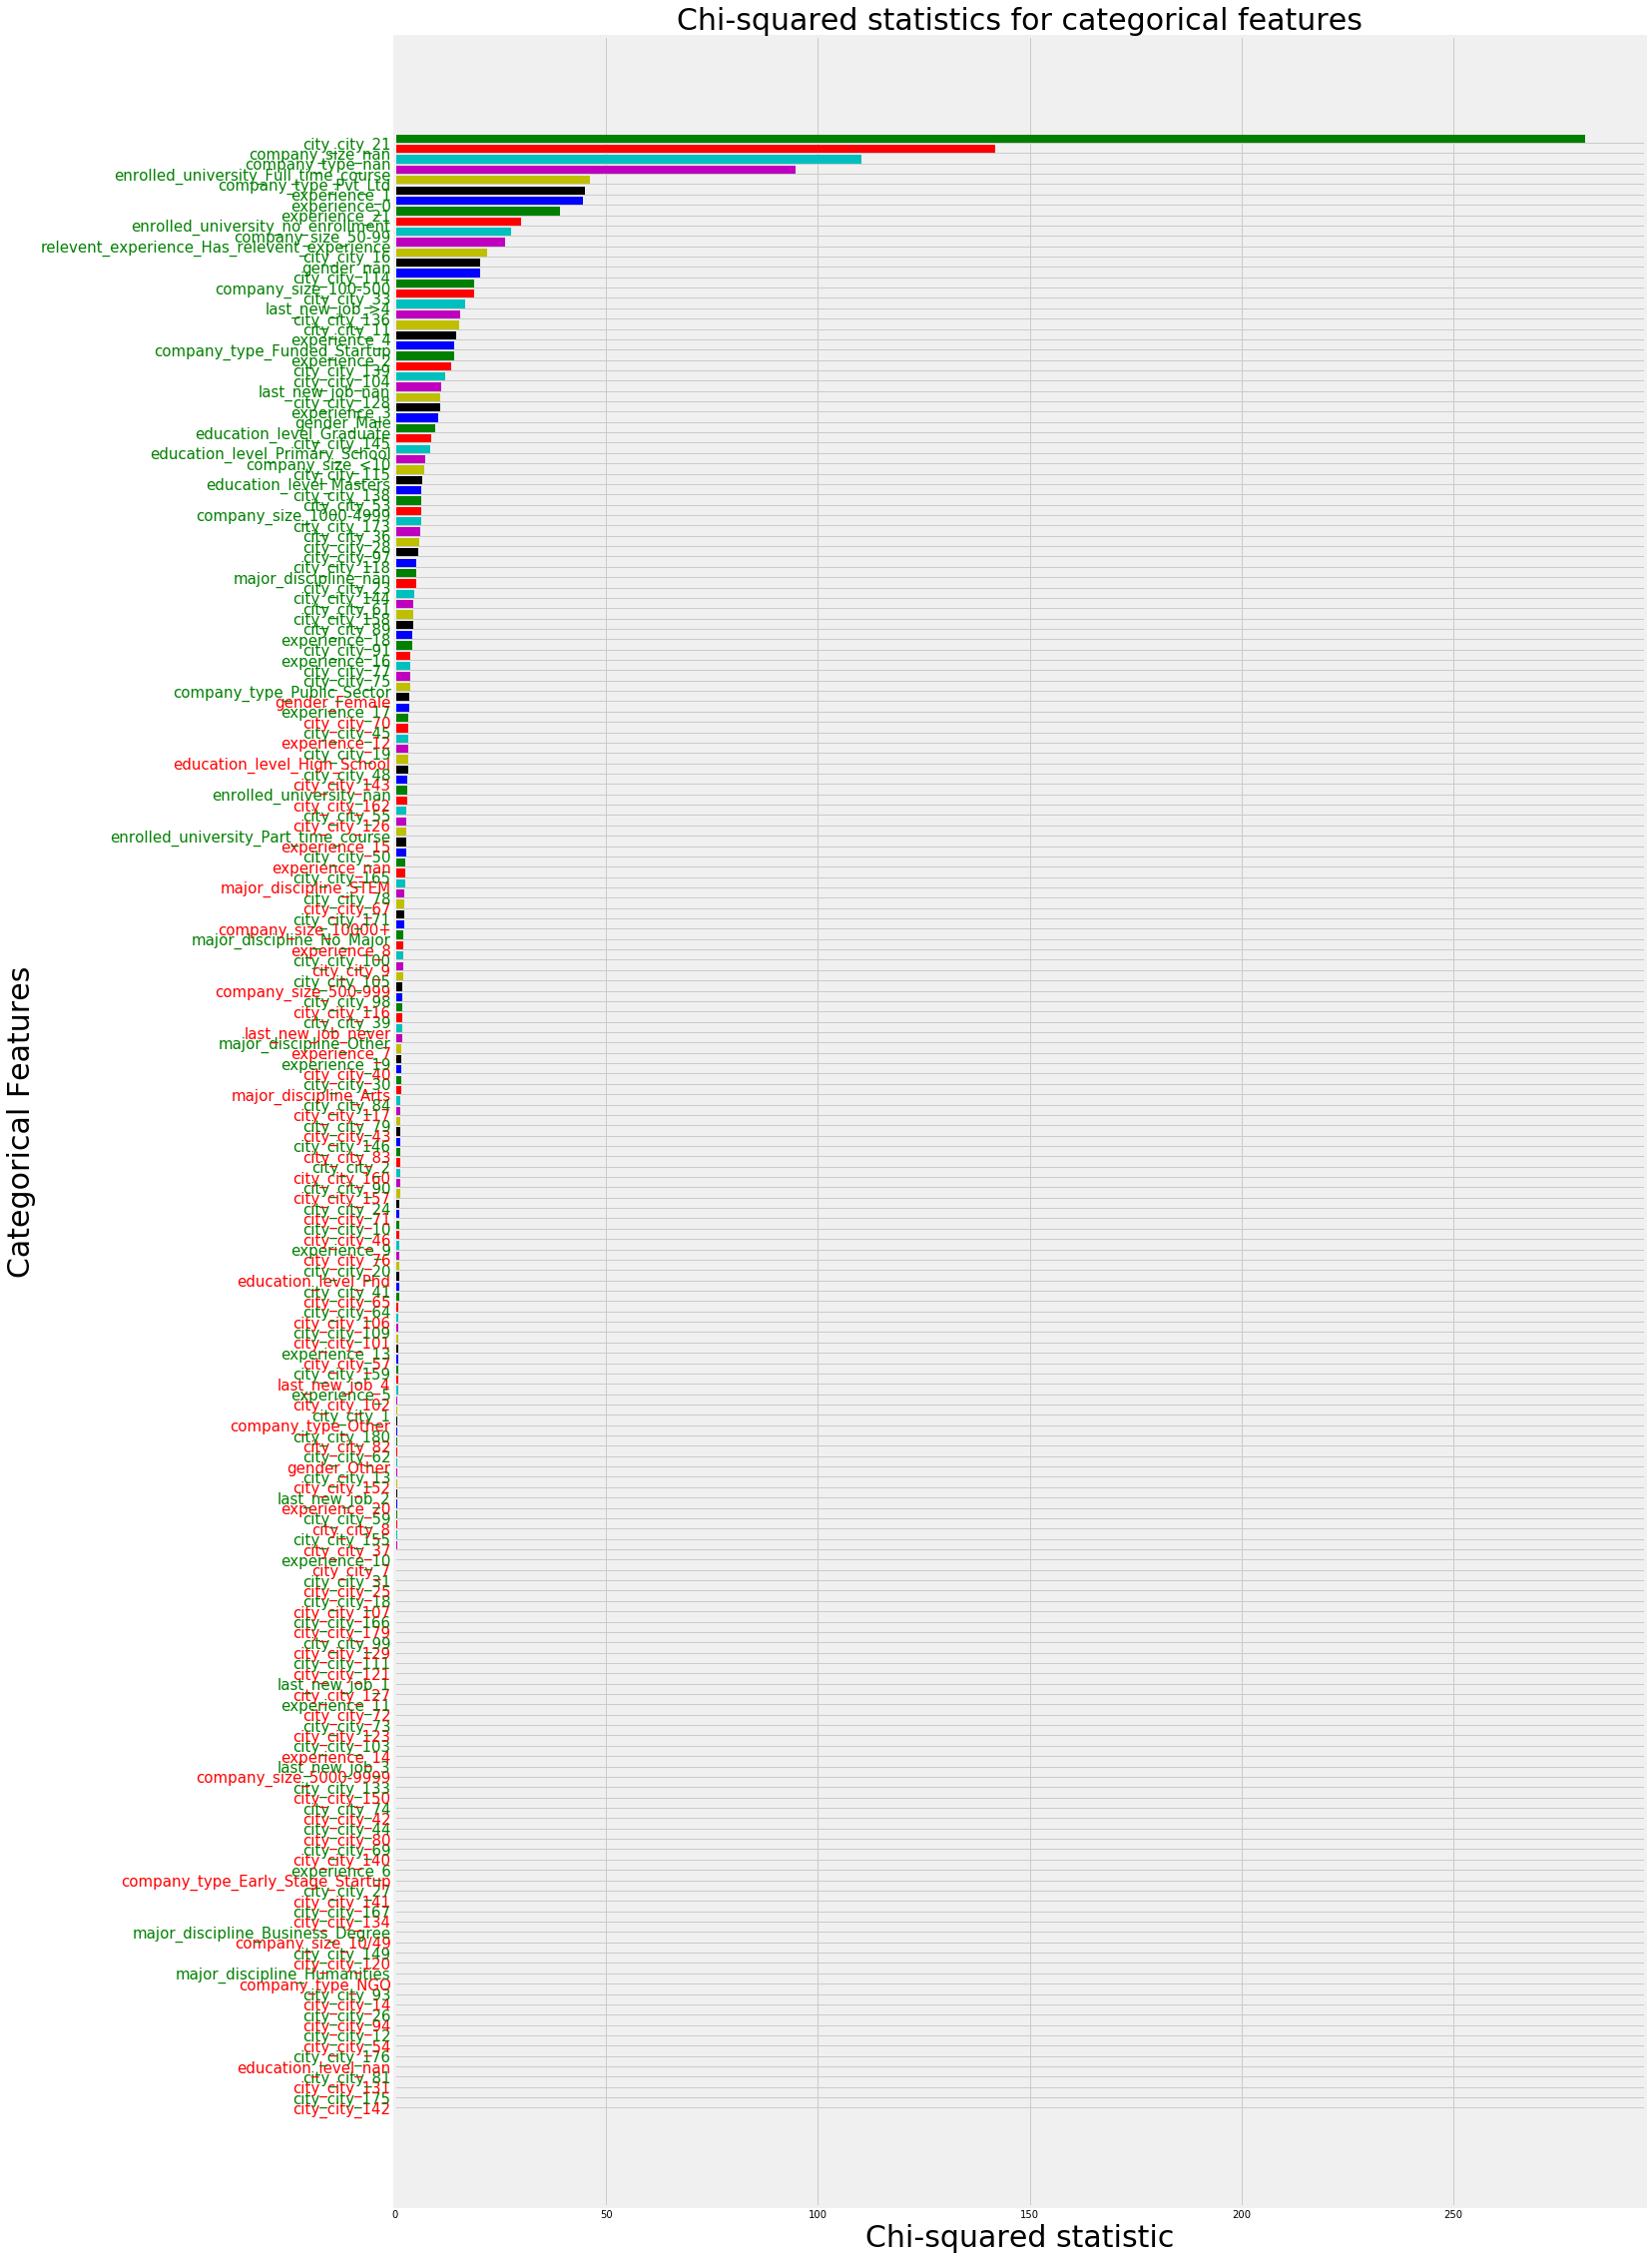

In [108]:
fig,ax=plt.subplots(figsize=(20,40))
plt.title("Chi-squared statistics for categorical features",fontsize=30)
plt.ylabel("Categorical Features",fontsize=30)
plt.xlabel("Chi-squared statistic",fontsize=30)
plt.barh(range(len(df_chi_s['chi_score'])),df_chi_s['chi_score'],align='edge',color='rgbkymc')
plt.yticks(range(len(df_chi_s['chi_score'])),df_chi_s['columns'],color='g',fontsize=15)
for i in range(0,138,2):
    ax.get_yticklabels()[i].set_color("red")
plt.show()

In [109]:
print('Feature with Chi-square statistic less than 1:',len(df_chi_s[df_chi_s.chi_score<1]['columns']))

Feature with Chi-square statistic less than 1: 77


In [110]:
cat_train.drop(df_chi_s[df_chi_s.chi_score<1]['columns'],axis=1,inplace=True)

In [111]:
train_X,test_X,train_y,test_y=train_test_split(cat_train,data['target'],random_state=200)
model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1)
model.fit(train_X,train_y)
print('Score after dropping features with Chi-squared statistic less than 1')
print('roc auc score:',roc_auc_score(test_y,model.predict_proba(test_X)[:,1]))

Score after dropping features with Chi-squared statistic less than 1
roc auc score: 0.6527058313931452


In [113]:
%%time
shape_1=cat_train.shape[1]
roc_auc=np.zeros([len(range(10,shape_1,5)),2],float)
k=0
df_chi_s.sort_values(by='chi_score',ascending=False,inplace=True)
for i in range(10,shape_1,5):
    train_X,test_X,train_y,test_y=train_test_split(cat_train[df_chi_s['columns'][:i]],data['target'],random_state=200)
    model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1)
    model.fit(train_X,train_y)
    roc_auc[k][0]=i
    roc_auc[k][1]=roc_auc_score(test_y,model.predict_proba(test_X)[:,1])                                
    k=k+1

CPU times: user 33.6 s, sys: 811 ms, total: 34.4 s
Wall time: 5.09 s


In [114]:
df_roc=pd.DataFrame(roc_auc,columns=['Features','roc_auc_score'])
df_roc.sort_values(by='roc_auc_score',inplace=True,ascending=False)
print('Top five roc_auc_scores with Feature count')
df_roc.head()

Top five roc_auc_scores with Feature count


,Features,roc_auc_score
19,105.0,0.649361
20,110.0,0.649270
16,90.0,0.649196
17,95.0,0.648066
18,100.0,0.648048


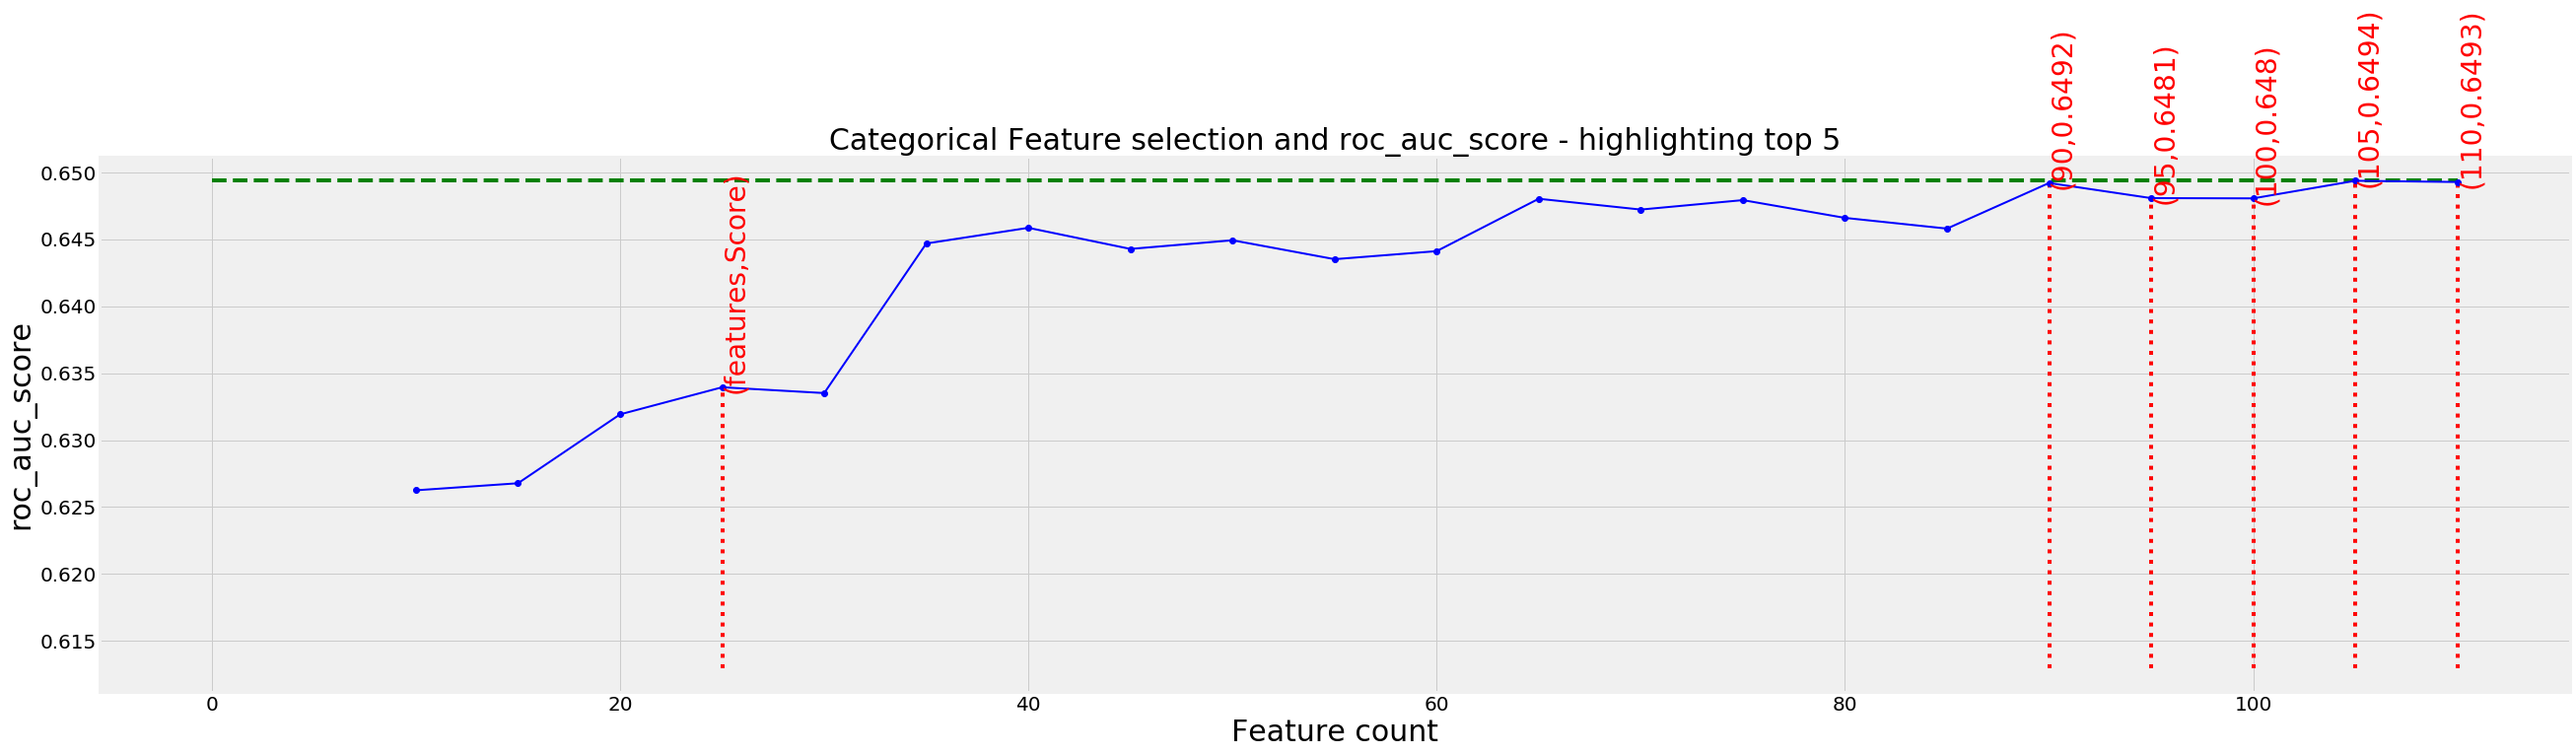

In [115]:
df_roc.sort_values(by='Features',inplace=True)
plt.figure(figsize=(40,10))
plt.title("Categorical Feature selection and roc_auc_score - highlighting top 5",fontsize=30)
plt.xlabel("Feature count",fontsize=30)
plt.ylabel("roc_auc_score",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(df_roc['Features'],df_roc['roc_auc_score'],color='b',linewidth=2)
plt.hlines(xmin=0,xmax=np.max(roc_auc[:,0]),y=np.max(roc_auc[:,1]),color='g',linestyle='dashed')
df_roc.sort_values(by='roc_auc_score',inplace=True,ascending=False)
for i in range(len(df_roc)):
    plt.plot(df_roc.iloc[i,0],df_roc.iloc[i,1],'bo')
    if i<=4:
        plt.text(df_roc.iloc[i,0],df_roc.iloc[i,1],(('('+str(np.int(df_roc.iloc[i,0]))+','+str(round(df_roc.iloc[i,1],4))+')')),color='r',fontsize=28,rotation=90)
        plt.vlines(ymin=0.613,ymax=df_roc.iloc[i,1],x=df_roc.iloc[i,0],color='r',linestyle='dotted')
    if i==16:
        plt.text(df_roc.iloc[i,0],df_roc.iloc[i,1],(('('+'features'+','+'Score')+')'),color='r',fontsize=28,rotation=90)
        plt.vlines(ymin=0.613,ymax=df_roc.iloc[i,1],x=df_roc.iloc[i,0],color='r',linestyle='dotted')
plt.show()

In [117]:
print('FEATURE SUMMARY: Binary Features')
bin_features=train_fs[((train_fs.Data_type=='int64') | (train_fs.Data_type=='float64')) & (train_fs.Unique_Count==2)].index
print('Total binary features (including TARGET):',len(bin_features))
bin_fs=train_fs[((train_fs.Data_type=='int64') | (train_fs.Data_type=='float64')) & (train_fs.Unique_Count==2)]
bin_fs['Desc']=bin_fs.index


FEATURE SUMMARY: Binary Features
Total binary features (including TARGET): 1


In [118]:
bin_fs

,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values,Desc
target,0,2,int64,1/0,0.132088,0.338595,2.1734,"[0, 1]",target


In [120]:
print('FEATURE SUMMARY: Continuous Features')
con_features=train_fs[((train_fs.Data_type=='float64') | (train_fs.Data_type=='int64')) & (train_fs.Unique_Count!=2)].index
print('Total continuous features:',len(con_features))
con_fs=train_fs[((train_fs.Data_type=='float64') | (train_fs.Data_type=='int64')) & (train_fs.Unique_Count!=2)]
con_fs['Desc']=con_fs.index
con_fs

FEATURE SUMMARY: Continuous Features
Total continuous features: 3


,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values,Desc
enrollee_id,0,18359,int64,33380/1,16729.4,9643.75,0.000565788,"[23798, 29166, 46, 18527, 21751, 13342, 11746,...",enrollee_id
city_development_index,0,93,float64,0.95/0.45,0.84714,0.110189,-1.32736,"[0.6890000000000001, 0.9229999999999999, 0.91,...",city_development_index
training_hours,0,241,int64,336/1,65.899,60.8853,1.81303,"[106, 69, 4, 26, 88, 34, 23, 8, 10, 85, 55, 13...",training_hours


In [122]:
train_X,test_X,train_y,test_y=train_test_split(data[con_features].drop(['enrollee_id'],axis=1),data['target'],random_state=200)
model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1)
model.fit(train_X,train_y)
print('Creating a basic model on continuous features')
print('roc auc score',roc_auc_score(test_y,model.predict_proba(test_X)[:,1]))

Creating a basic model on continuous features
roc auc score 0.5891888028588446


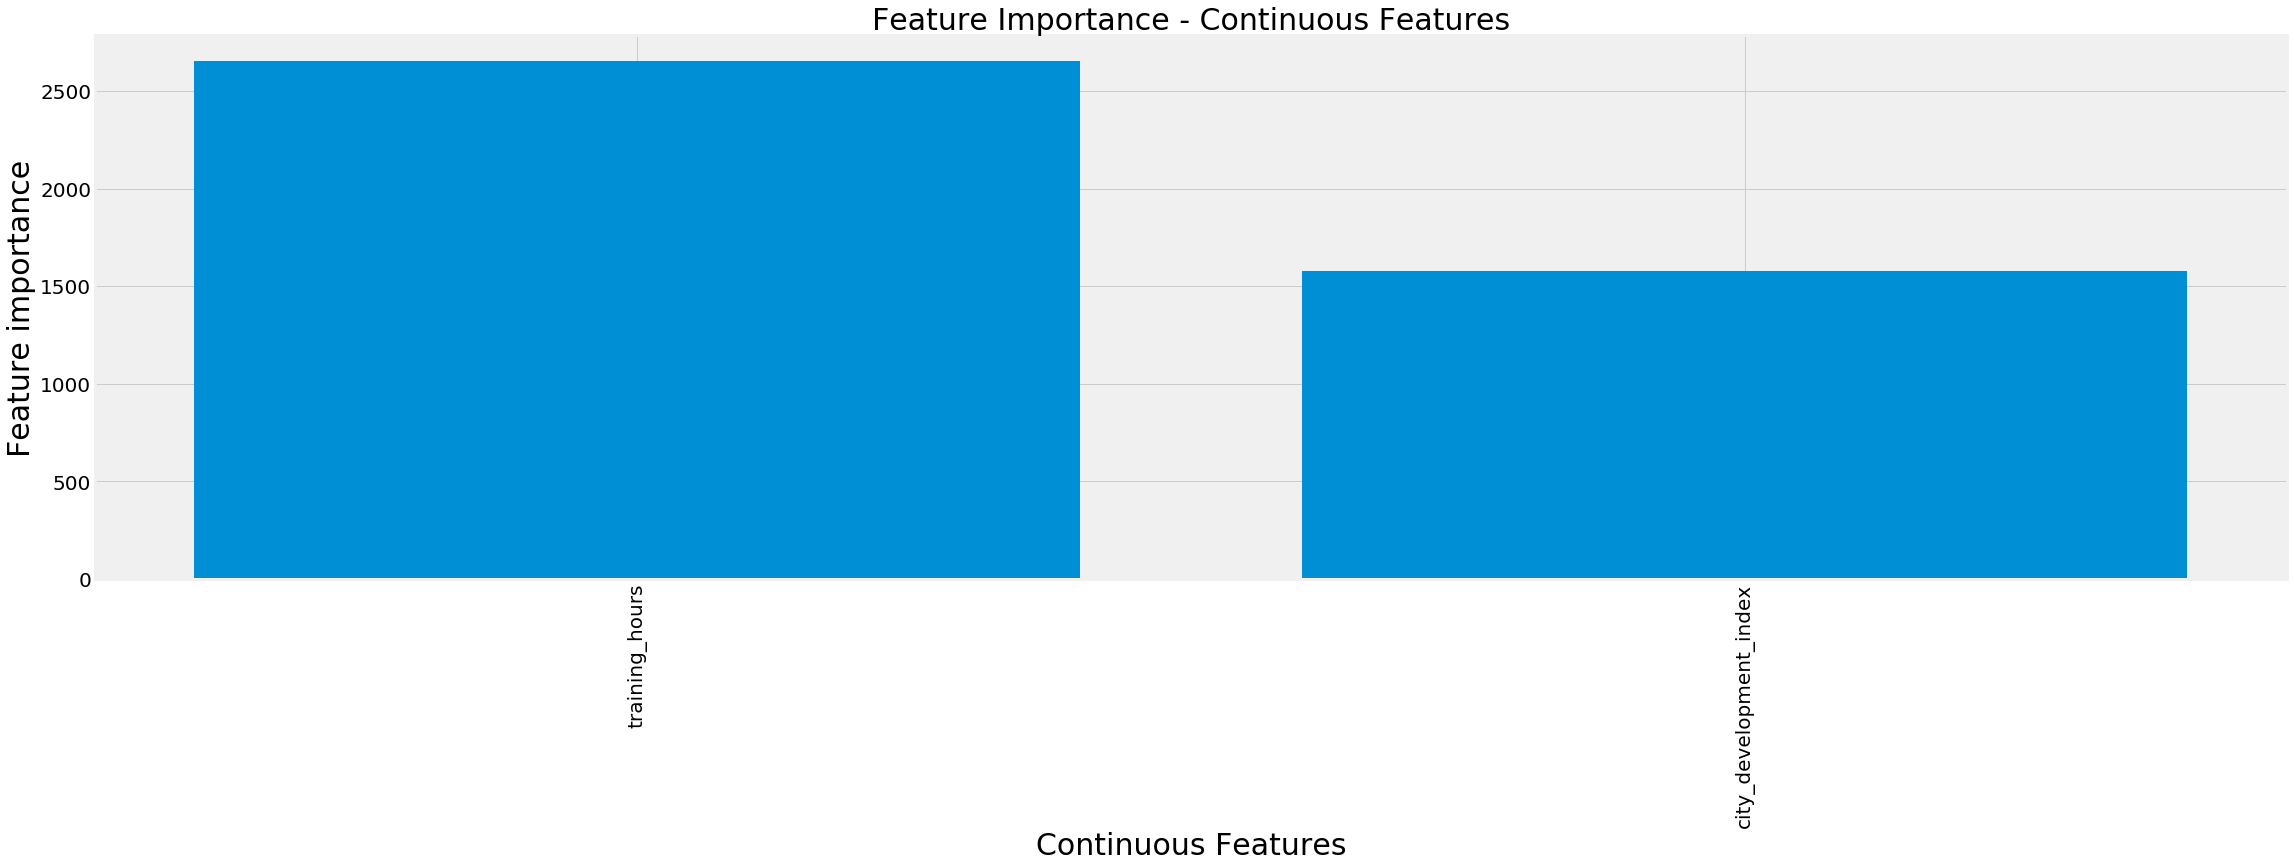

In [125]:
indices = np.argsort(model.feature_importances_)[::-1]
names = [data[con_features].drop(['enrollee_id'],axis=1).columns[i] for i in indices[:]]
plt.figure(figsize=(35,10))
plt.title("Feature Importance - Continuous Features",fontsize=30)
plt.xlabel("Continuous Features",fontsize=30)
plt.ylabel("Feature importance",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.bar(range(2), model.feature_importances_[indices[:]])
plt.xticks(range(2), names,rotation=90)

plt.show()

In [126]:
#Updated null values for continuous features their mean value 
for col in con_features[1:]:
    if train_fs.at[col,'Null']!=0:
        train[col]=train[col].fillna(train_fs.at[col,'Mean'])

In [129]:
print('Concatenating all categorical, binary and continuous features ')
final_train=pd.concat([cat_train,data[bin_features],data[con_features]],axis=1)
print('Shape of final training data set:',final_train.shape)


del cat_train,bin_features,model,con_features
gc.collect()

Concatenating all categorical, binary and continuous features 
Shape of final training data set: (18359, 118)


4479

In [130]:
train_X,test_X,train_y,test_y=train_test_split(final_train.drop(['target','enrollee_id'],axis=1),final_train['target'])
model =LGBMClassifier(learning_rate=0.05,n_estimators=200,n_jobs=-1,reg_alpha=0.1,min_split_gain=.1,verbose=-1)
model.fit(train_X,train_y)
print('Creating a final LGBM classifier on final training dataset')
print('roc auc score:',roc_auc_score(test_y,model.predict_proba(test_X)[:,1]))

Creating a final LGBM classifier on final training dataset
roc auc score: 0.6503842854980576


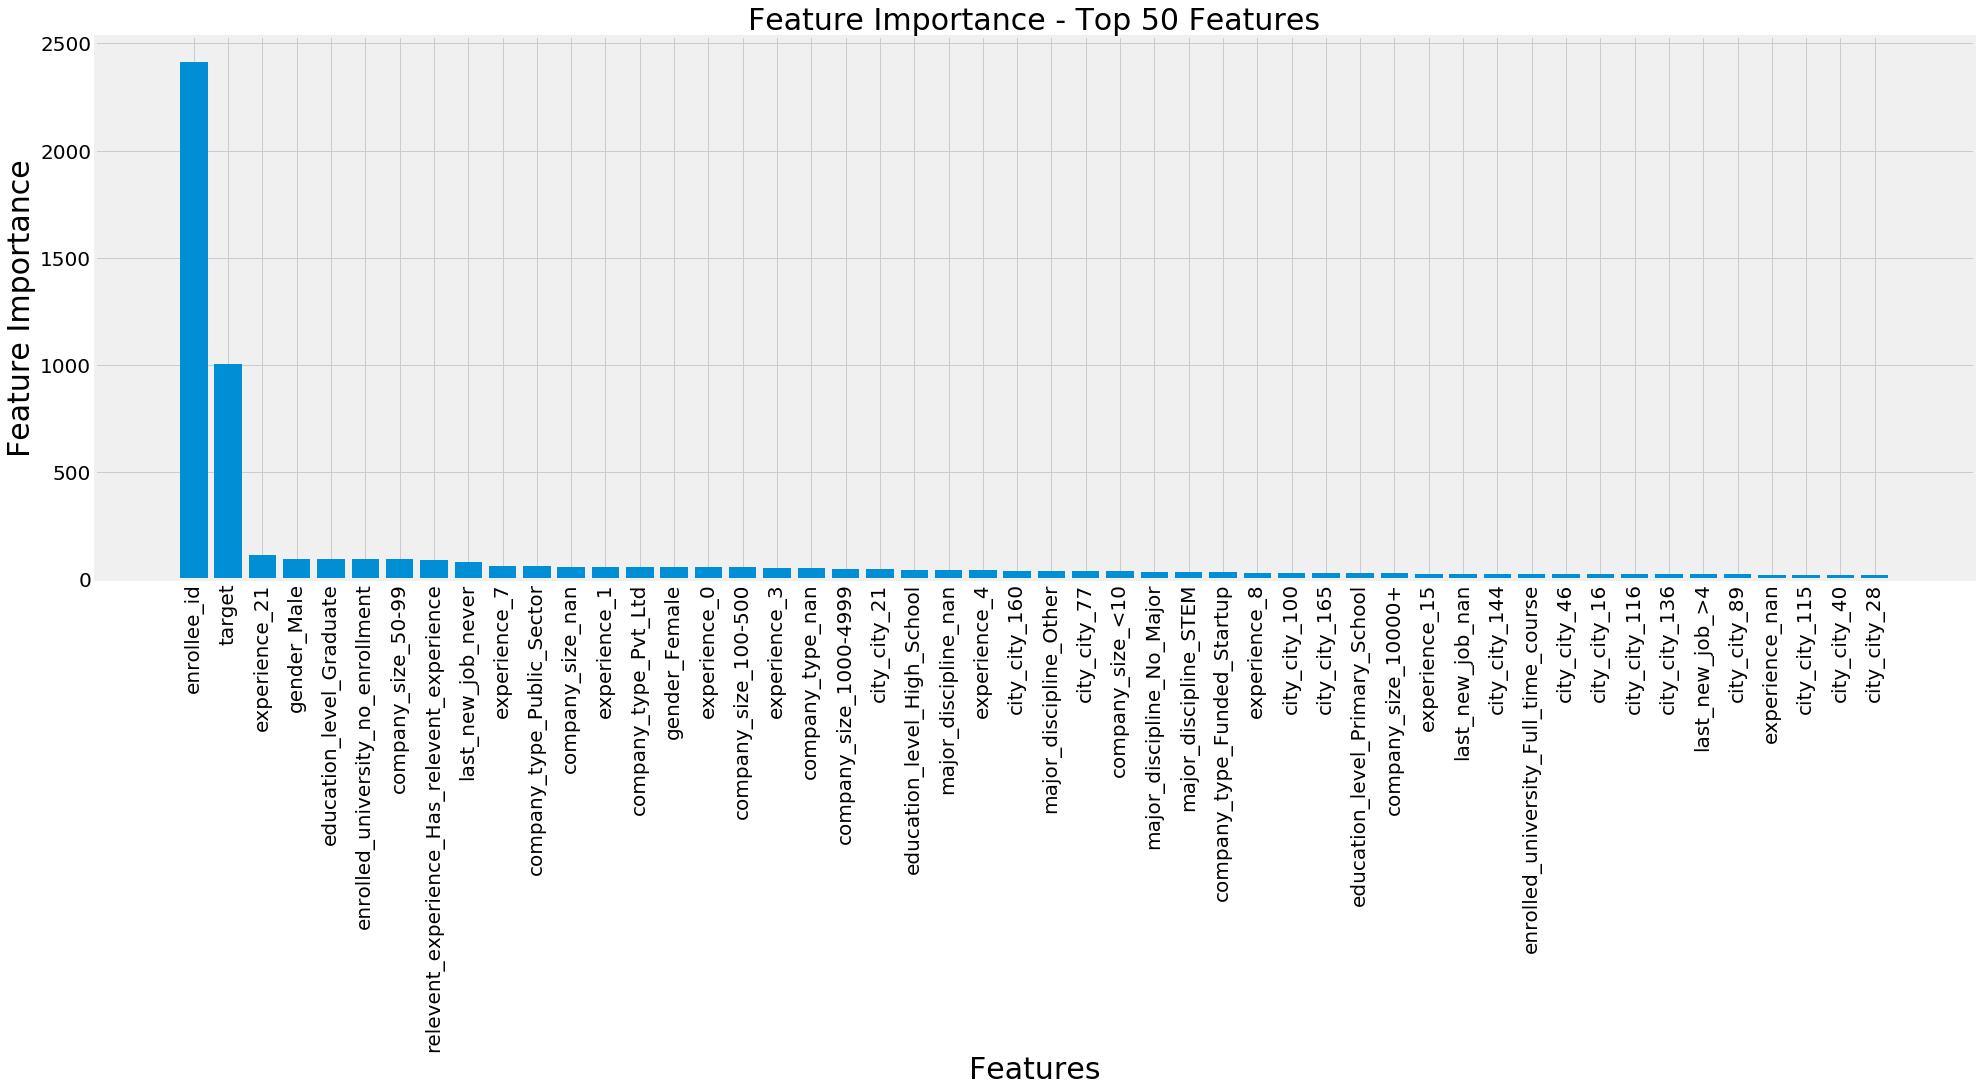

In [131]:
indices = np.argsort(model.feature_importances_)[::-1]
names = [final_train.columns[i] for i in indices[:50]]
plt.figure(figsize=(30,10))
plt.title("Feature Importance - Top 50 Features",fontsize=30)
plt.xlabel("Features",fontsize=30)
plt.ylabel("Feature Importance",fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.bar(range(50), model.feature_importances_[indices[:50]])
plt.xticks(range(50), names,rotation=90)

plt.show()

In [136]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [220]:
final_train = final_train.drop('enrollee_id',axis = 1)
train,test=train_test_split(final_train,test_size=0.3,random_state=0,stratify=final_train['target'])
train_X=train.drop('target',axis = 1)
train_Y=train['target']
test_X=test.drop('target',axis = 1)
test_Y=test['target']
X=final_train.drop('target',axis = 1)
Y=final_train['target']

In [221]:
final_train['target'].head()

0    0
1    0
2    0
3    0
4    1
Name: target, dtype: int64

In [222]:
model = LogisticRegression(class_weight={ 0:0.75, 1:0.25 })
model.fit(train_X,train_Y)
prediction3=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8678286129266521


In [150]:
test_data = pd.read_csv('test.csv')
test_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [153]:
#train=pd.read_csv(path1+'application_train.csv')
print('application_train Feature Summary')
with pd.option_context('display.max_rows',test_data.shape[1]):
    test_fs=feature_summary(test_data) 

application_train Feature Summary
DataFrame shape
rows: 15021
cols: 13


,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values
enrollee_id,0,15021,int64,33378/6,16643,9626.9,-0.000747201,"[16548, 12036, 11061, 5032, 17599, 19314, 1236..."
city,0,123,object,-,-,-,-,"[city_33, city_28, city_103, city_104, city_77..."
city_development_index,0,93,float64,0.95/0.45,0.846683,0.109709,-1.30319,"[0.44799999999999995, 0.9390000000000001, 0.92..."
gender,3388,4,object,-,-,-,-,"[nan, Male, Female, Other]"
relevent_experience,0,2,object,-,-,-,-,"[No relevent experience, Has relevent experience]"
enrolled_university,279,4,object,-,-,-,-,"[Full time course, no_enrollment, Part time co..."
education_level,395,6,object,-,-,-,-,"[Graduate, Phd, High School, Masters, nan, Pri..."
major_discipline,2393,7,object,-,-,-,-,"[STEM, nan, Arts, Humanities, Other, No Major,..."
experience,44,23,object,-,-,-,-,"[<1, >20, 3, 6, 7, 9, 18, 2, 10, 14, 16, 5, 19..."
company_size,4051,9,object,-,-,-,-,"[1000-4999, 50-99, nan, <10, 100-500, 10000+, ..."


In [155]:
print('FEATURE SUMMARY: Categorical Features')
cat_features=test_fs[test_fs.Data_type=='object'].index
print('Total categorical features:',len(cat_features))

FEATURE SUMMARY: Categorical Features
Total categorical features: 10


In [156]:
cat_fs=test_fs[test_fs.Data_type=='object']
cat_fs['Desc']=cat_fs.index
cat_fs

,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values,Desc
city,0,123,object,-,-,-,-,"[city_33, city_28, city_103, city_104, city_77...",city
gender,3388,4,object,-,-,-,-,"[nan, Male, Female, Other]",gender
relevent_experience,0,2,object,-,-,-,-,"[No relevent experience, Has relevent experience]",relevent_experience
enrolled_university,279,4,object,-,-,-,-,"[Full time course, no_enrollment, Part time co...",enrolled_university
education_level,395,6,object,-,-,-,-,"[Graduate, Phd, High School, Masters, nan, Pri...",education_level
major_discipline,2393,7,object,-,-,-,-,"[STEM, nan, Arts, Humanities, Other, No Major,...",major_discipline
experience,44,23,object,-,-,-,-,"[<1, >20, 3, 6, 7, 9, 18, 2, 10, 14, 16, 5, 19...",experience
company_size,4051,9,object,-,-,-,-,"[1000-4999, 50-99, nan, <10, 100-500, 10000+, ...",company_size
company_type,4330,7,object,-,-,-,-,"[Public Sector, Pvt Ltd, nan, NGO, Funded Star...",company_type
last_new_job,304,7,object,-,-,-,-,"[nan, 1, 2, >4, never, 4, 3]",last_new_job


In [193]:
test_data['experience'][test_data['experience'] == '>20'] = 21
test_data['experience'][test_data['experience'] == '<1'] = 0

In [189]:
for col in cat_features:
    test_data[col]=test_data[col].apply(lambda x: str(x).replace(" ","_"))
#converting call categorical features into dummies 
cat_train=pd.DataFrame()
for col in cat_features:
    dummy=pd.get_dummies(test_data[col],prefix=col)
    cat_train=pd.concat([cat_train,dummy],axis=1)
cat_train.head()

,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,...,company_type_Public_Sector,company_type_Pvt_Ltd,company_type_nan,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_nan,last_new_job_never
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [160]:
print('FEATURE SUMMARY: Continuous Features')
con_features=test_fs[((test_fs.Data_type=='float64') | (test_fs.Data_type=='int64')) & (test_fs.Unique_Count!=2)].index
print('Total continuous features:',len(con_features))
con_fs=test_fs[((test_fs.Data_type=='float64') | (test_fs.Data_type=='int64')) & (test_fs.Unique_Count!=2)]
con_fs['Desc']=con_fs.index
con_fs

FEATURE SUMMARY: Continuous Features
Total continuous features: 3


,Null,Unique_Count,Data_type,Max/Min,Mean,Std,Skewness,Sample_values,Desc
enrollee_id,0,15021,int64,33378/6,16643,9626.9,-0.000747201,"[16548, 12036, 11061, 5032, 17599, 19314, 1236...",enrollee_id
city_development_index,0,93,float64,0.95/0.45,0.846683,0.109709,-1.30319,"[0.44799999999999995, 0.9390000000000001, 0.92...",city_development_index
training_hours,0,241,int64,336/1,65.1582,59.7192,1.79309,"[15, 94, 17, 76, 65, 33, 48, 84, 85, 99, 42, 1...",training_hours


In [161]:
#Updated null values for continuous features their mean value 
for col in con_features[1:]:
    if test_fs.at[col,'Null']!=0:
        test[col]=test[col].fillna(test_fs.at[col,'Mean'])

In [190]:
print('Concatenating all categorical, binary and continuous features ')
final_test=pd.concat([cat_train,test_data[con_features]],axis=1)
print('Shape of final training data set:',final_train.shape)


#del cat_train,bin_features,model,con_features
#gc.collect()

Concatenating all categorical, binary and continuous features 
Shape of final training data set: (18359, 118)


In [166]:
print(final_train.shape)
print(final_test.shape)
#pred_X = final_test.drop(['enrollee_id'])
#

(18359, 118)
(15021, 194)


In [205]:

predcols = list(final_train.columns)
predcols.remove('target')

In [212]:

pred_X_id = final_test[predcols]

In [214]:
pred_X = pred_X_id.drop('enrollee_id',axis = 1)

In [223]:
log_prediction=model.predict(pred_X)

In [225]:
pred_X_id['log_prediction'] = log_prediction

(15021,)

In [241]:

sub = test_data[['enrollee_id']]

In [243]:
sub['log_prediction'] = log_prediction

In [245]:
sub[sub['log_prediction'] == 1]

,enrollee_id,log_prediction


In [246]:
sub.to_csv('log_pred.csv')